# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
flight_data=pd.read_excel('flight_price.xlsx')
flight_data.head()

# Get the number of rows and columns
num_rows, num_columns = flight_data.shape

print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 10683 rows and 11 columns.


# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

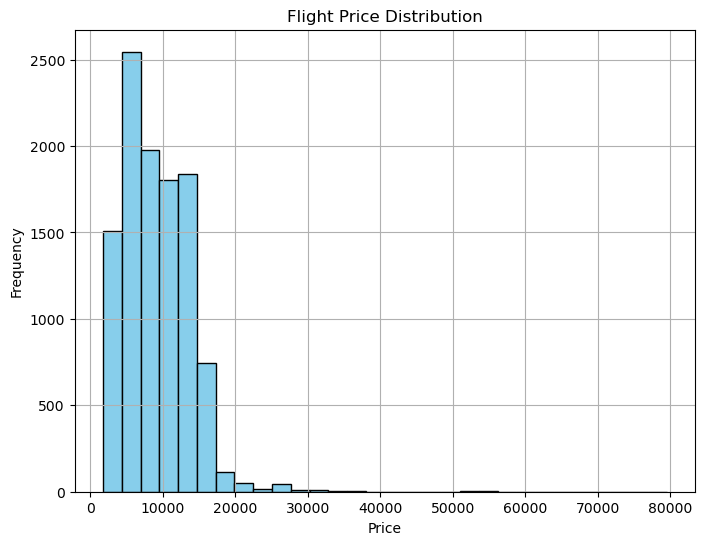

In [2]:
import matplotlib.pyplot as plt

# Select the column containing flight prices (replace 'price_column_name' with the actual column name)
price_data = flight_data['Price']

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(price_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [3]:
flight_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:

# Select the column containing flight prices (replace 'price_column_name' with the actual column name)
price_data = flight_data['Price']

# Calculate the minimum and maximum prices
min_price = price_data.min()
max_price = price_data.max()

print(f"The minimum price is ${min_price:.2f}")
print(f"The maximum price is ${max_price:.2f}")


The minimum price is $1759.00
The maximum price is $79512.00


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

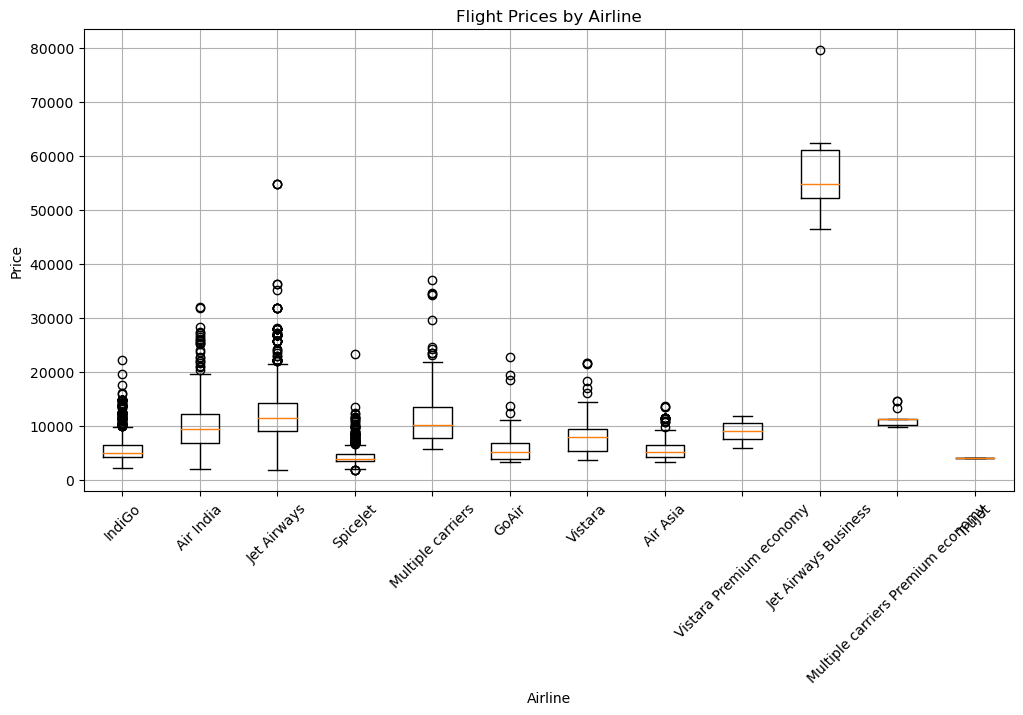

In [5]:
import matplotlib.pyplot as plt
# Specify the column containing airline information and the price column (replace 'airline_column' and 'price_column' with actual column names)
airline_column = 'Airline'
price_column = 'Price'

# Create a boxplot to compare prices by airline
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')

# Use boxplot to compare prices by airline
plt.boxplot([flight_data[price_column][flight_data[airline_column] == airline] for airline in flight_data[airline_column].unique()],
            labels=flight_data[airline_column].unique())

plt.show()


# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis

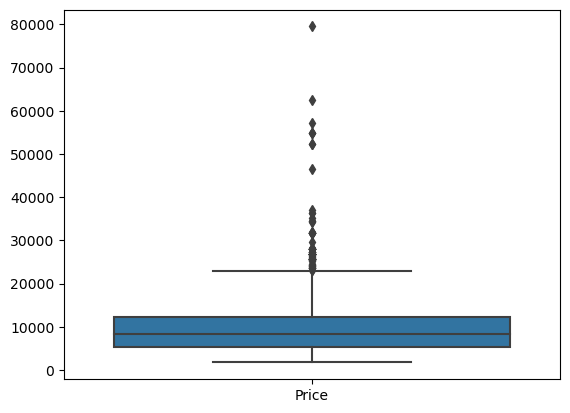

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
sns.boxplot(data=flight_data)
plt.show()


# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

C:\Users\SMITA\AppData\Local\Temp\ipykernel_33716\2777151994.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'])


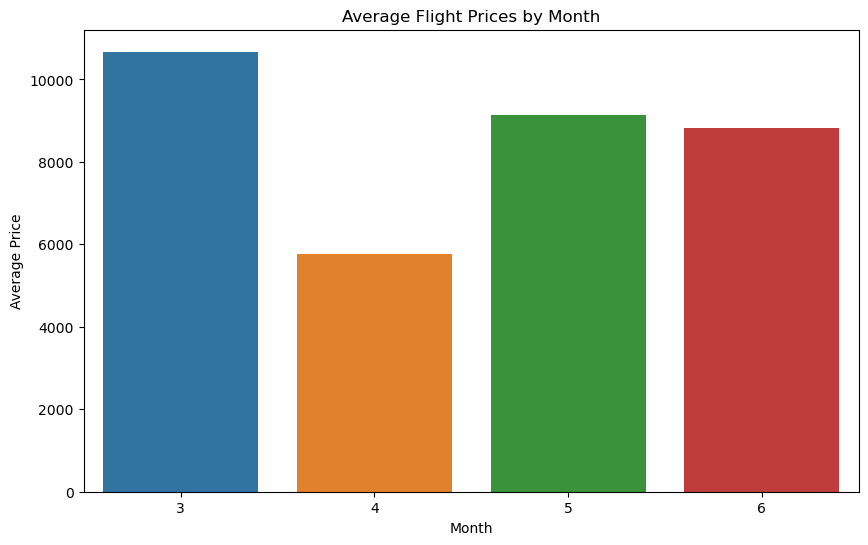

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'flight_data' is your Flight Price dataset
# Make sure you have a column 'Date' that contains the date of the flight.

# Convert the 'Date' column to a datetime object
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'])

# Extract features like month, week, and day of the week
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Weekday'] = flight_data['Date_of_Journey'].dt.weekday

# Group data by month and calculate average prices
monthly_avg_prices = flight_data.groupby('Month')['Price'].mean()

# Create a bar plot to show the average prices by month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_prices.index, y=monthly_avg_prices.values)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.show()


# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [8]:
flight_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,6


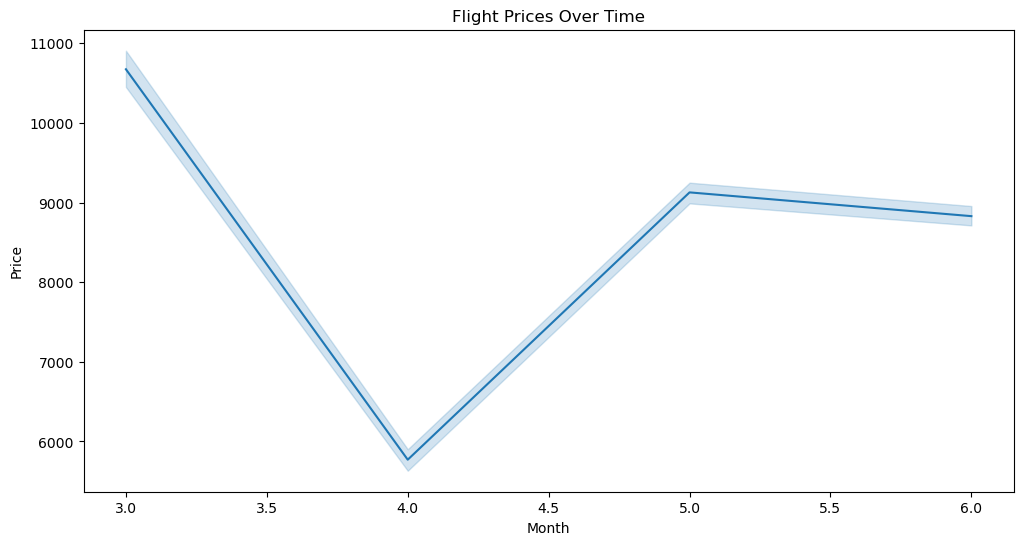

In [9]:
# Analyze trends in flight prices over time (month)
plt.figure(figsize=(12, 6))
sns.lineplot(data=flight_data, x='Month', y='Price')
plt.title('Flight Prices Over Time')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

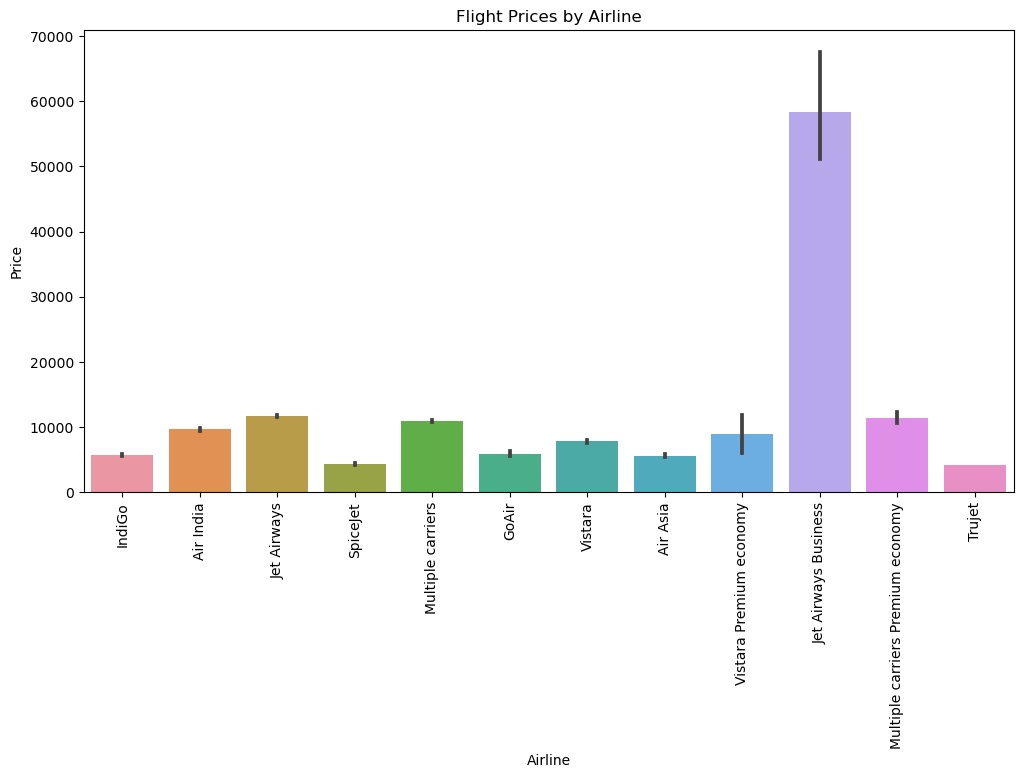

In [10]:
# Analyze trends by airline
plt.figure(figsize=(12, 6))
sns.barplot(data=flight_data, x='Airline', y='Price')
plt.title('Flight Prices by Airline')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()



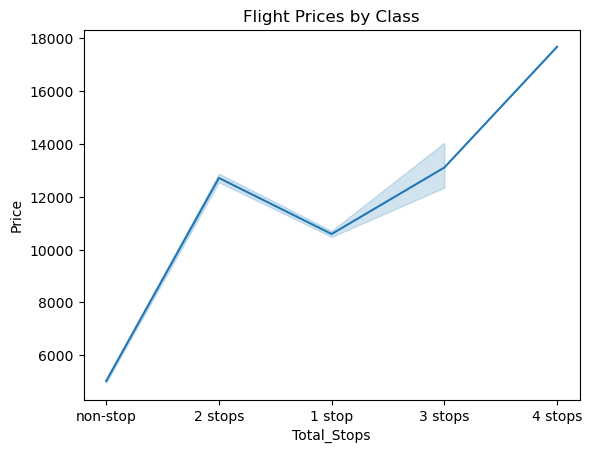

In [11]:
# Analyze the impact of Total_Stops on flight prices
sns.lineplot(data=flight_data, x='Total_Stops', y='Price')
plt.title('Flight Prices by Class')
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.show()

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [12]:
flight_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,6


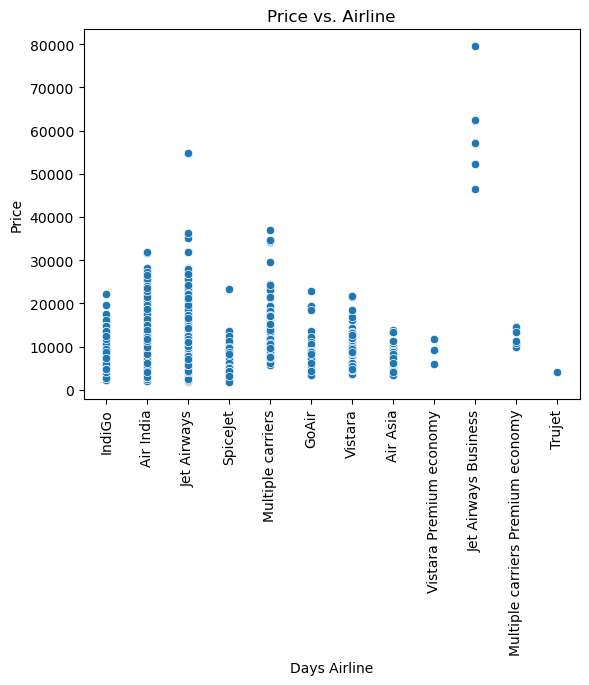

In [13]:
# Analyze factors affecting flight prices
# Example: Airline vs. price
sns.scatterplot(data=flight_data, x='Airline', y='Price')
plt.title('Price vs. Airline')
plt.xlabel('Days Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

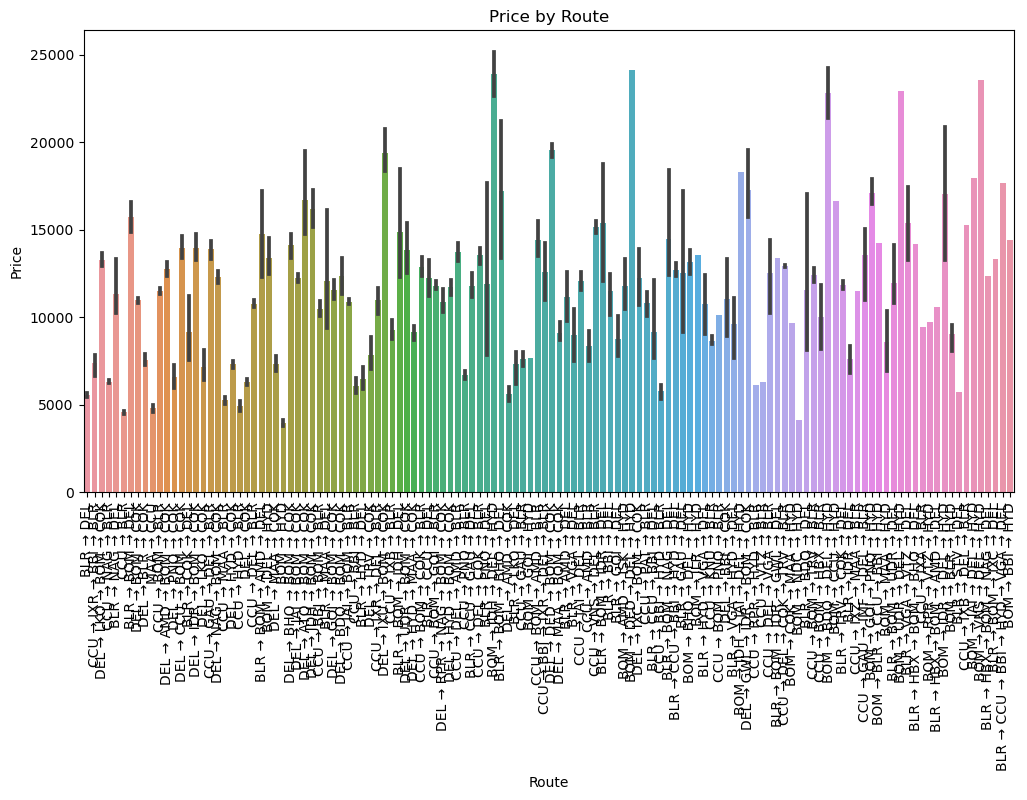

In [14]:
# Example: Route vs. price
plt.figure(figsize=(12, 6))
sns.barplot(data=flight_data, x='Route', y='Price')
plt.title('Price by Route')
plt.xticks(rotation=90)
plt.xlabel('Route')
plt.ylabel('Price')
plt.show()

# Google Playstore

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [16]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df.shape

(10841, 13)

**inferens:** In this data have 10841 rows 13 columns

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

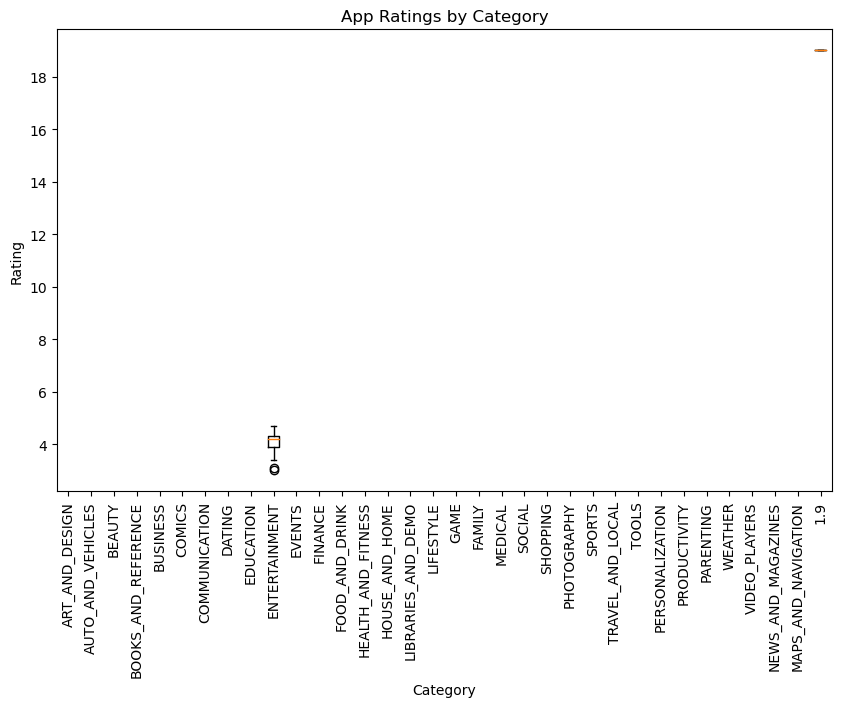

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
# Create a boxplot
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)  # Rotate category names on the x-axis for better readability
plt.title("App Ratings by Category")

# Use 'category' and 'rating' columns from your dataset
plt.boxplot([df[df['Category'] == category]['Rating'] for category in df['Category'].unique()], labels=df['Category'].unique())

plt.ylabel("Rating")
plt.xlabel("Category")

plt.show()


# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [19]:
missing_values = df.isnull().sum()

In [20]:
missing_values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [21]:
missing_percentage = (missing_values / len(df)) * 100

In [22]:
missing_percentage

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

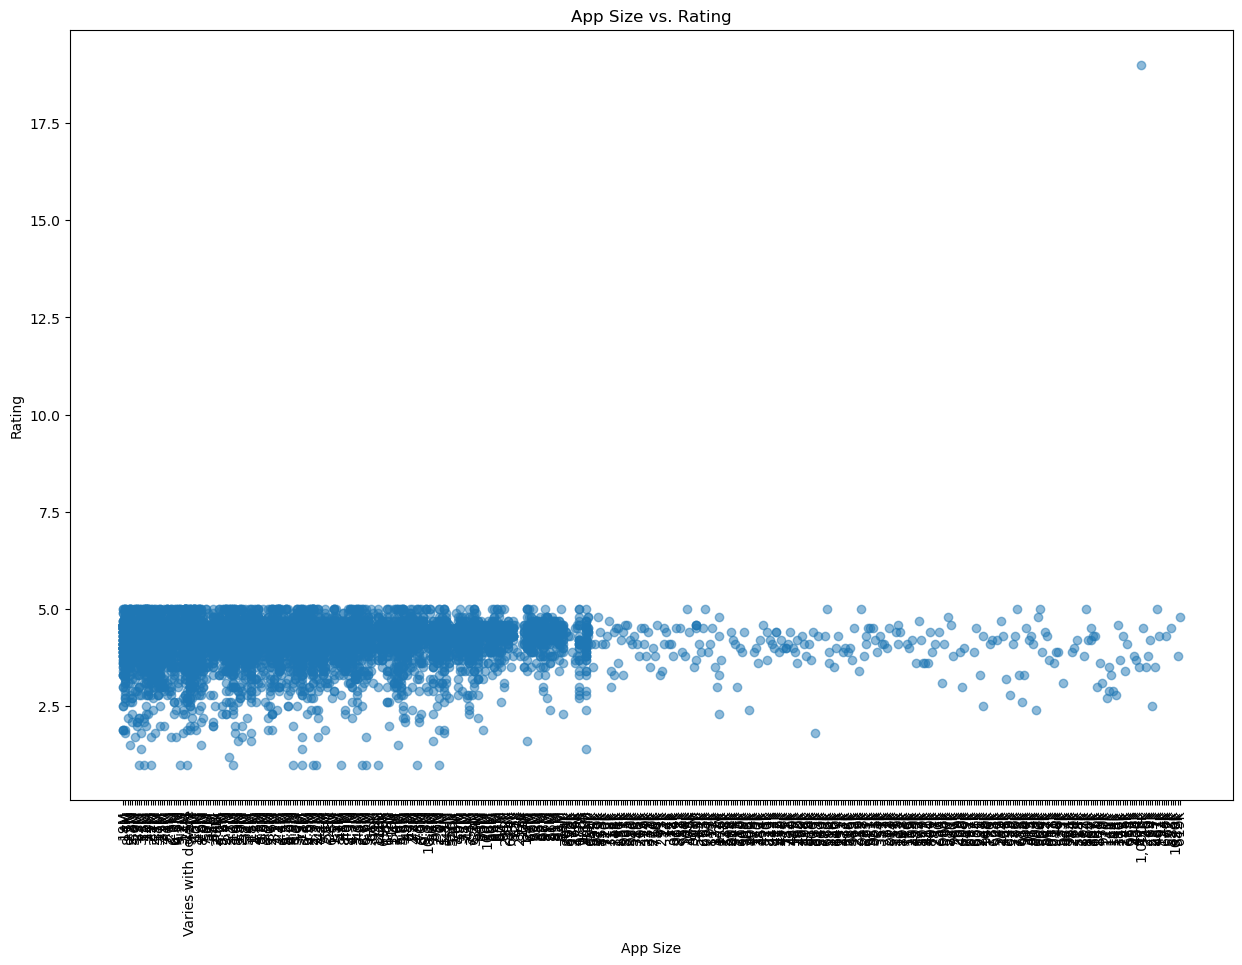

In [23]:
plt.figure(figsize=(15, 10)) 
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.title('App Size vs. Rating')
plt.xlabel('App Size')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.grid(False)

plt.show()


# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [24]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


<Figure size 1000x600 with 0 Axes>

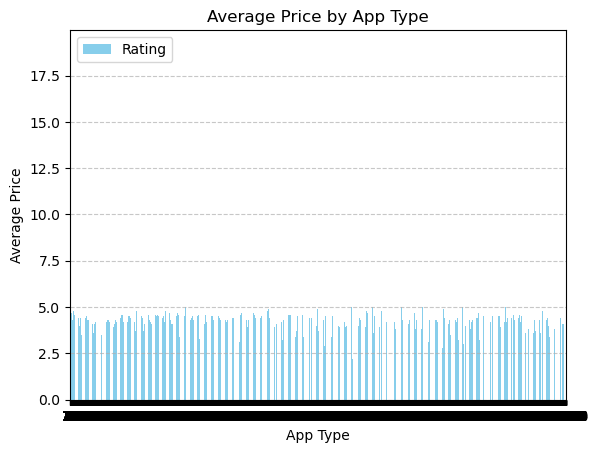

In [25]:
plt.figure(figsize=(10, 6))
df.plot(kind='bar', color='skyblue')
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [26]:
app_installs = df['App'].value_counts().reset_index()
app_installs.columns = ['App', 'Number of Installs']
app_installs = app_installs.sort_values(by='Number of Installs', ascending=False)


In [27]:
top_10_apps = app_installs.head(10)

In [28]:
print(top_10_apps)

                                                  App  Number of Installs
0                                              ROBLOX                   9
1   CBS Sports App - Scores, News, Stats & Watch Live                   8
2                                                ESPN                   7
3                      Duolingo: Learn Languages Free                   7
4                                    Candy Crush Saga                   7
5                                         8 Ball Pool                   7
11                                     Subway Surfers                   6
15   Sniper 3D Gun Shooter: Free Shooting Games - FPS                   6
14                                         Helix Jump                   6
13                                       Temple Run 2                   6


In [31]:
df['Reviews'].str.isnumeric().sum()

10840

In [32]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [33]:
df_copy=df.copy()

In [34]:
df_copy=df_copy.drop(df_copy.index[10472])

In [35]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [36]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [37]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [38]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [39]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [41]:
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

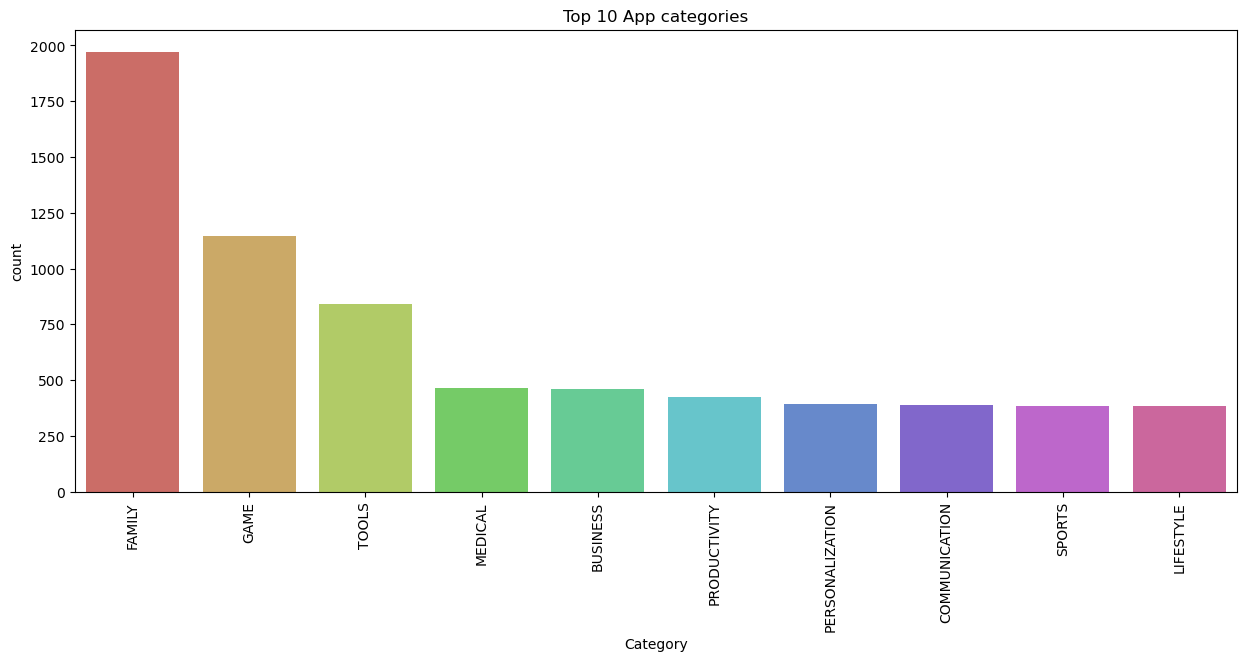

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

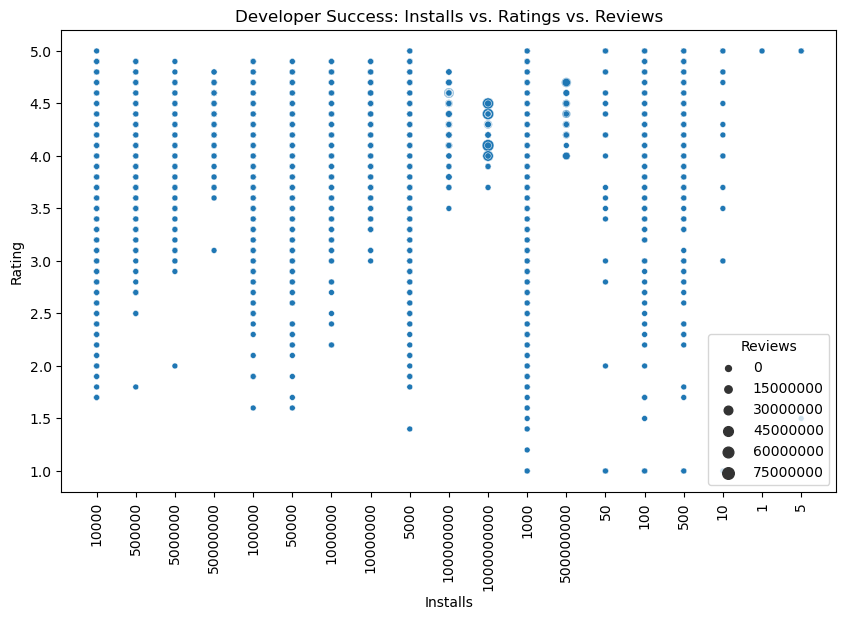

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', size='Reviews', data=df_copy)
plt.title('Developer Success: Installs vs. Ratings vs. Reviews')
plt.xticks(rotation=90)
plt.show()

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [52]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

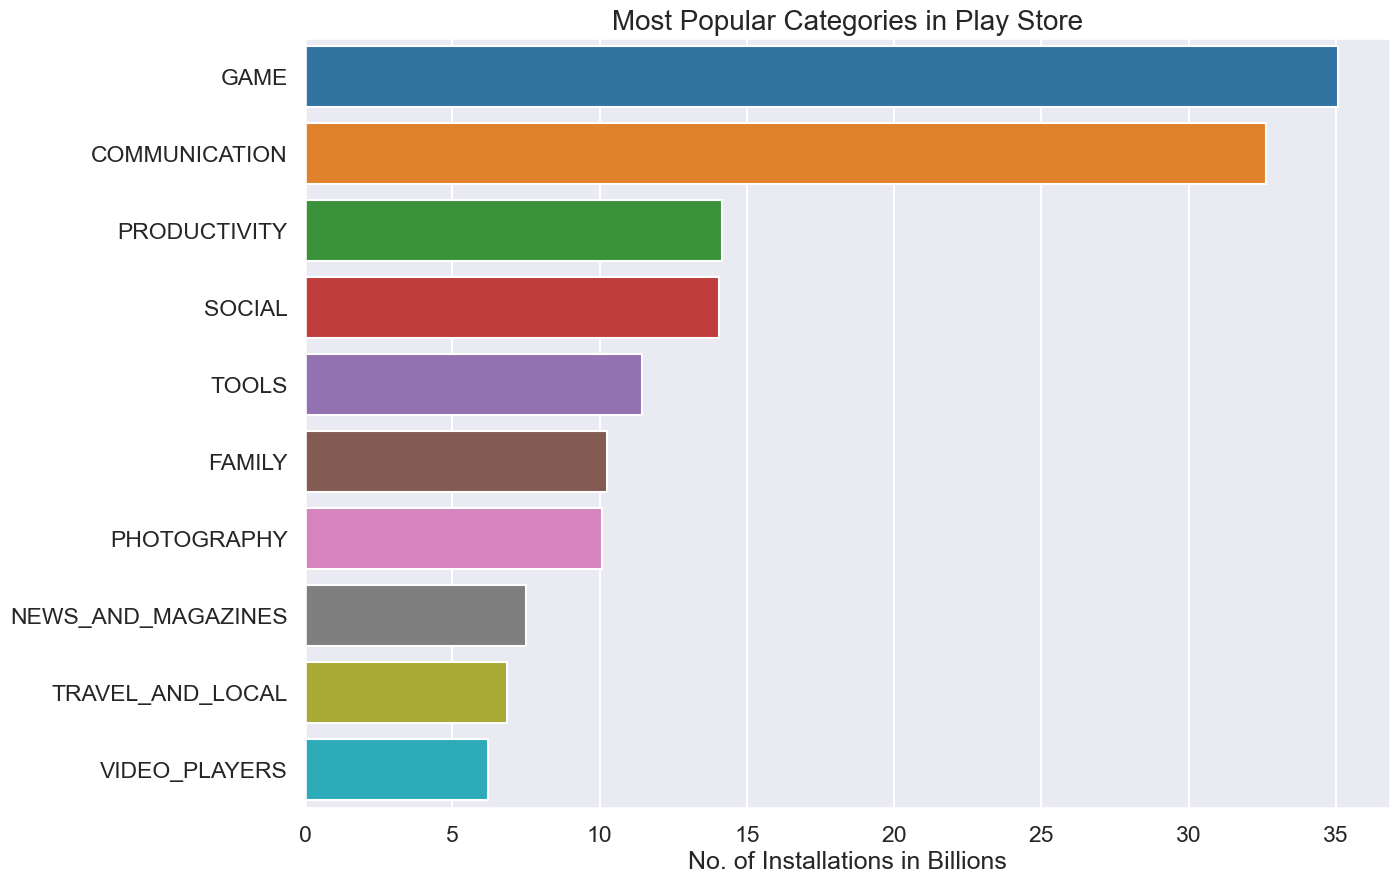

In [53]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)